In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

/Users/naaz.27khan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_csv("/Users/naaz.27khan/Desktop/ML/out.csv")

In [3]:
df

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender_F,Gender_M
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1.0,0.0,M,R,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883,0,1
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2.0,457.0,M,R,88.0,14.0,2.0,30.0,0.0,2004.0,0.681,0.876,0,1
2,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1.0,0.0,F,R,88.0,18.0,3.0,28.0,0.0,1215.0,0.710,1.444,1,0
3,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2.0,538.0,F,R,90.0,18.0,3.0,27.0,0.0,1200.0,0.718,1.462,1,0
4,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1.0,0.0,M,R,80.0,12.0,4.0,28.0,0.0,1689.0,0.712,1.039,0,1
5,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2.0,1010.0,M,R,83.0,12.0,4.0,29.0,0.5,1701.0,0.711,1.032,0,1
6,9,OAS2_0005,OAS2_0005_MR3,Nondemented,3.0,1603.0,M,R,85.0,12.0,4.0,30.0,0.0,1699.0,0.705,1.033,0,1
7,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1.0,0.0,F,R,93.0,14.0,2.0,30.0,0.0,1272.0,0.698,1.380,1,0
8,14,OAS2_0008,OAS2_0008_MR2,Nondemented,2.0,742.0,F,R,95.0,14.0,2.0,29.0,0.0,1257.0,0.703,1.396,1,0
9,15,OAS2_0009,OAS2_0009_MR1,Demented,1.0,0.0,M,R,68.0,12.0,2.0,27.0,0.5,1457.0,0.806,1.205,0,1


In [5]:
df.columns

Index(['Unnamed: 0', 'Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay',
       'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF', 'Gender_F', 'Gender_M'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender_F,Gender_M
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,185.711864,1.884181,601.353107,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780,0.576271,0.423729
std,105.586942,0.925330,640.596081,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821,0.494848,0.494848
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000,0.000000,0.000000
25%,94.250000,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250,0.000000,0.000000
50%,184.500000,2.000000,559.500000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500,1.000000,0.000000
75%,276.750000,2.000000,882.500000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500,1.000000,1.000000
max,372.000000,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000,1.000000,1.000000


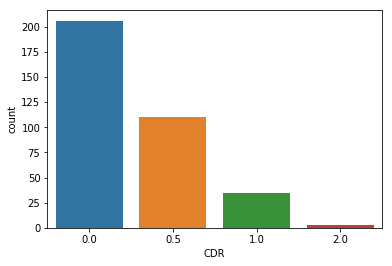

In [147]:
sns.countplot(label='M/F', x='CDR', data=df)

/Users/naaz.27khan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/naaz.27khan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/naaz.27khan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


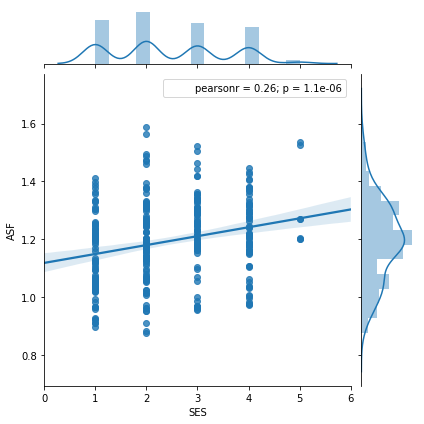

In [156]:
sns.jointplot("SES","ASF", data=df, kind="reg")

In [137]:
X = df[["nWBV","ASF","MMSE","SES","eTIV","EDUC"]]
y = df["Age"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(354, 6) (354, 1)


In [138]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [139]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [140]:

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [141]:

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
import matplotlib.pyplot as plt

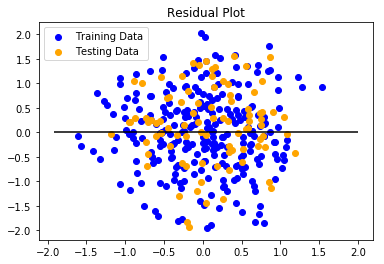

In [143]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [144]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6085742164728438, R2: 0.3213027937730739


In [145]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.618463902942579, R2: 0.3102735677628573
